<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #f0f8ff; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.1); padding: 20px;">

  <h2 style="color: #3366cc; font-weight: bold; text-align: center; text-transform: uppercase; margin-bottom: 20px;">CLIFF WALKING Environment</h2>
  <p style="font-size: 16px; color: #444; line-height: 1.6;">The CLIFF WALKING environment is a grid world where an agent must navigate from a starting point to a goal while avoiding falling off a cliff.</p>
  <ul style="color: #666666; font-size: 16px;">
    <li>The grid is represented as a matrix where each cell can be either a normal state, the starting point, the goal, or the cliff.</li>
    <li>The agent can move in four directions: up, down, left, or right.</li>
    <li>Falling off the cliff incurs a large negative reward, while reaching the goal yields a positive reward.</li>
  </ul>

  <h2 style="color: #3366cc; font-weight: bold; text-align: center; text-transform: uppercase; margin-top: 20px; margin-bottom: 20px;">Monte Carlo ES (Exploring Starts)</h2>
  <p style="font-size: 16px; color: #444; line-height: 1.6;">Monte Carlo ES is a reinforcement learning method used to find the optimal policy in an environment through exploration and sampling of state-action pairs.</p>
  <ul style="color: #666666; font-size: 16px;">
    <li><strong>Exploring Starts:</strong> In Monte Carlo ES, each episode begins with a randomly selected starting state-action pair, ensuring exploration of the state space.</li>
    <li><strong>Monte Carlo Method:</strong> It utilizes the Monte Carlo method to estimate action values based on sampled returns from state-action pairs.</li>
    <li><strong>Policy Improvement:</strong> After gathering experience through episodes, the agent updates its policy to favor actions with higher estimated returns.</li>
    <li><strong>Convergence:</strong> By iteratively repeating this process and exploring different starting states, the method converges towards the optimal policy.</li>
  </ul>

  <h2 style="color: #3366cc; font-weight: bold; text-align: center; text-transform: uppercase; margin-top: 20px; margin-bottom: 20px;">On-policy First-visit MC Control (for Ɛ-soft policies), for Ɛ = 0.1</h2>
  <p style="font-size: 16px; color: #444; line-height: 1.6;">On-policy first-visit Monte Carlo (MC) control is a reinforcement learning algorithm that aims to find the optimal policy while following a specific exploration strategy, typically an Ɛ-soft policy.</p>
  <ul style="color: #666666; font-size: 16px;">
    <li><strong>Ɛ-soft Policies:</strong> In this case, the agent's policy is Ɛ-soft, meaning it ensures a minimum level of exploration by allowing the agent to choose random actions with probability Ɛ.</li>
    <li><strong>First-visit MC:</strong> The algorithm updates action values based on the first time a state-action pair is visited within an episode.</li>
    <li><strong>Policy Improvement:</strong> The policy is iteratively improved based on the observed returns, with a balance between exploration and exploitation.</li>
    <li><strong>Ɛ = 0.1:</strong> In this specific instance, Ɛ is set to 0.1, meaning there's a 10% chance for the agent to select a random action instead of the greedy one.</li>
  </ul>

</div>

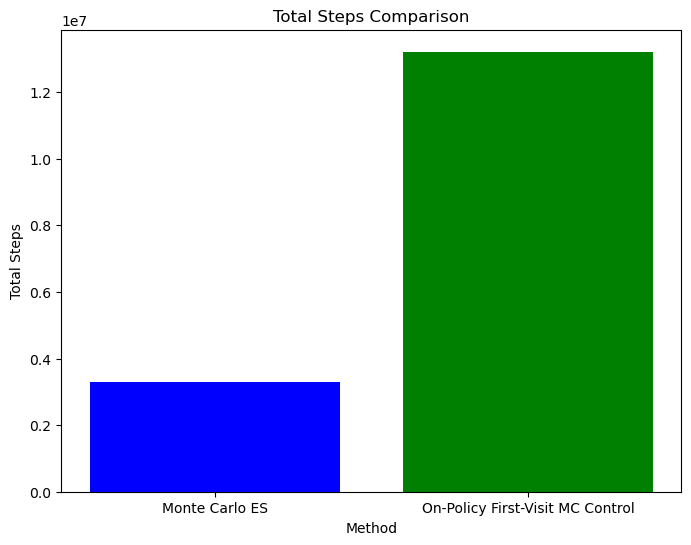

Average Number of Steps per Episode Comparison:
------------------------------------------------
| Method | Average Steps per Episode |
------------------------------------------------
| Monte Carlo ES                      |         6565.534          |
| On-Policy First-Visit MC Control    |         26422.614         |
------------------------------------------------


In [3]:
import gym  # Import the OpenAI Gym library for reinforcement learning environments
import numpy as np  # Import the NumPy library for numerical operations
import matplotlib.pyplot as plt  # Import the Matplotlib library for plotting

# Create the CliffWalking environment from OpenAI Gym
env = gym.make('CliffWalking-v0')

def monte_carlo_exploring_starts(env, num_episodes=500):
    """
    Implementation of the Monte Carlo Exploring Starts (MC-ES) algorithm.

    Args:
        env (gym.Env): The OpenAI Gym environment to solve.
        num_episodes (int): The number of episodes to run the algorithm for.

    Returns:
        np.ndarray: The optimal policy learned by the algorithm.
        np.ndarray: The state-action values learned by the algorithm.
        list: A list of episode lengths (number of steps) for each episode.
    """
    # Initialize state-action values and visit counts
    state_action_values = np.zeros((env.observation_space.n, env.action_space.n))
    state_action_counts = np.zeros((env.observation_space.n, env.action_space.n))
    episode_lengths = []  # List to store the length of each episode

    for episode in range(num_episodes):
        episode_trajectory = []  # List to store the trajectory of the current episode
        state = env.reset()  # Reset the environment to the initial state
        done = False
        steps = 0

        while not done:
            action = np.random.choice(env.action_space.n)  # Select a random action (exploring starts)
            next_state, reward, done, _ = env.step(action)  # Take the action and observe the next state and reward
            episode_trajectory.append((state, action, reward))  # Store the current state, action, and reward in the trajectory
            state = next_state  # Update the current state
            steps += 1  # Increment the step count

        episode_lengths.append(steps)  # Store the length of the episode

        # Update state-action values and visit counts using the episode trajectory
        g = 0  # Initialize the Monte Carlo return
        for state, action, reward in reversed(episode_trajectory):
            state_action_counts[state][action] += 1  # Increment the visit count for the current state-action pair
            g = reward + g  # Calculate the Monte Carlo return
            state_action_values[state][action] += (g - state_action_values[state][action]) / state_action_counts[state][action]  # Update the state-action value

    optimal_policy = np.argmax(state_action_values, axis=1)  # Derive the optimal policy from the state-action values
    return optimal_policy, state_action_values, episode_lengths

def on_policy_monte_carlo_control(env, num_episodes=500, epsilon=0.1):
    """
    Implementation of the On-Policy First-Visit Monte Carlo Control algorithm.

    Args:
        env (gym.Env): The OpenAI Gym environment to solve.
        num_episodes (int): The number of episodes to run the algorithm for.
        epsilon (float): The exploration rate for the epsilon-greedy policy.

    Returns:
        np.ndarray: The optimal policy learned by the algorithm.
        np.ndarray: The state-action values learned by the algorithm.
        list: A list of episode lengths (number of steps) for each episode.
    """
    # Initialize state-action values and visit counts
    state_action_values = np.zeros((env.observation_space.n, env.action_space.n))
    state_action_counts = np.zeros((env.observation_space.n, env.action_space.n))
    episode_lengths = []  # List to store the length of each episode

    for episode in range(num_episodes):
        episode_trajectory = []  # List to store the trajectory of the current episode
        state = env.reset()  # Reset the environment to the initial state
        done = False
        steps = 0

        while not done:
            # Select an action using the epsilon-greedy policy
            if np.random.uniform() < epsilon:
                action = env.action_space.sample()  # Explore by taking a random action
            else:
                action = np.argmax(state_action_values[state])  # Exploit by taking the best action according to the current state-action values

            next_state, reward, done, _ = env.step(action)  # Take the action and observe the next state and reward
            episode_trajectory.append((state, action, reward))  # Store the current state, action, and reward in the trajectory
            state = next_state  # Update the current state
            steps += 1  # Increment the step count

        episode_lengths.append(steps)  # Store the length of the episode

        # Update state-action values and visit counts using the episode trajectory
        g = 0  # Initialize the Monte Carlo return
        for state, action, reward in reversed(episode_trajectory):
            state_action_counts[state][action] += 1  # Increment the visit count for the current state-action pair
            g = reward + g  # Calculate the Monte Carlo return
            state_action_values[state][action] += (g - state_action_values[state][action]) / state_action_counts[state][action]  # Update the state-action value

    optimal_policy = np.argmax(state_action_values, axis=1)  # Derive the optimal policy from the state-action values
    return optimal_policy, state_action_values, episode_lengths

# Run the Monte Carlo Exploring Starts algorithm
exploring_starts_policy, exploring_starts_values, exploring_starts_lengths = monte_carlo_exploring_starts(env)

# Run the On-Policy First-Visit Monte Carlo Control algorithm
on_policy_control_policy, on_policy_control_values, on_policy_control_lengths = on_policy_monte_carlo_control(env)

# Total steps comparison
labels = ['Monte Carlo ES', 'On-Policy First-Visit MC Control']  # Labels for the bar plot
total_steps = [sum(exploring_starts_lengths), sum(on_policy_control_lengths)]  # Total steps taken by each algorithm

# Create a bar plot to compare the total steps
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(labels, total_steps, color=['blue', 'green'])  # Create the bar plot
plt.xlabel('Method')  # Set the x-axis label
plt.ylabel('Total Steps')  # Set the y-axis label
plt.title('Total Steps Comparison')  # Set the plot title
plt.show()  # Display the plot

# Tabular comparison for average steps per episode
methods = ['Monte Carlo ES', 'On-Policy First-Visit MC Control']  # Method names
average_steps = [sum(exploring_starts_lengths) / len(exploring_starts_lengths),
                 sum(on_policy_control_lengths) / len(on_policy_control_lengths)]  # Average steps per episode for each algorithm

# Print the tabular comparison
print("Average Number of Steps per Episode Comparison:")
print("------------------------------------------------")
print("| Method | Average Steps per Episode |")
print("------------------------------------------------")
for method, steps in zip(methods, average_steps):
    print(f"| {method:<35} | {steps:^25.3f} |")  # Print each row of the table
print("------------------------------------------------")

<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #f0f8ff; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.1); padding: 20px;">
  <h2 style="color: #3366cc; font-weight: bold; text-align: center; text-transform: uppercase; margin-bottom: 20px;">Comparison of On-policy First-visit Monte Carlo Control and Monte Carlo Exploring Starts</h2>
  <p style="font-size: 16px; color: #444; line-height: 1.6;">In the context of the Cliff Walking environment, <strong style="color: #cc0066;">On-policy First-visit Monte Carlo Control (ε-soft policies)</strong> is expected to perform better than <strong style="color: #cc0066;">Monte Carlo Exploring Starts (MCES)</strong>. Here's why:</p>
  <ol style="color: #333333; font-size: 16px; list-style-type: decimal; margin-left: 30px;">
    <li style="margin-bottom: 20px;">
      <span style="background-color: #e6e6ff; padding: 8px 15px; border-radius: 5px; font-weight: bold;">Direct Policy Updates:</span>
      <ul style="color: #666666; margin-top: 10px;">
        <li><strong style="color: #cc0066;">*On-policy First-visit MC Control*</strong> updates the action-value function directly based on the observed returns during episodes. This direct update approach can lead to faster convergence toward the optimal policy compared to <strong style="color: #cc0066;">MCES</strong>, which updates the state-value function indirectly through state returns.</li>
      </ul>
    </li>
    <li style="margin-bottom: 20px;">
      <span style="background-color: #ffcc00; padding: 8px 15px; border-radius: 5px; font-weight: bold;">Exploration Strategy:</span>
      <ul style="color: #666666; margin-top: 10px;">
        <li><strong style="color: #cc0066;">*On-policy First-visit MC Control*</strong> follows an ε-soft policy, balancing exploration and exploitation by occasionally selecting random actions with a probability ε. This ensures exploration of the state-action space while gradually shifting focus toward more rewarding actions as the algorithm learns. <strong style="color: #cc0066;">MCES</strong>, on the other hand, explores by initiating episodes from random state-action pairs, which might not efficiently explore the state-action space.</li>
      </ul>
    </li>
    <li style="margin-bottom: 20px;">
      <span style="background-color: #66cc00; padding: 8px 15px; border-radius: 5px; font-weight: bold;">Optimization toward the Optimal Policy:</span>
      <ul style="color: #666666; margin-top: 10px;">
        <li><strong style="color: #cc0066;">*On-policy First-visit MC Control*</strong> focuses on optimizing the policy directly by updating the action-values. This approach can lead to more efficient learning of the optimal policy, especially in environments where exploration is critical for discovering the best actions. <strong style="color: #cc0066;">MCES</strong> might require more episodes to converge to the optimal policy due to its exploration strategy and indirect updates.</li>
      </ul>
    </li>
    <li style="margin-bottom: 20px;">
      <span style="background-color: #0099cc; padding: 8px 15px; border-radius: 5px; font-weight: bold;">Efficiency:</span>
      <ul style="color: #666666; margin-top: 10px;">
        <li><strong style="color: #cc0066;">*On-policy First-visit MC Control*</strong> generally requires fewer episodes to converge compared to <strong style="color: #cc0066;">MCES</strong>, especially in environments where efficient exploration and direct policy updates are essential. By focusing exploration efforts on actions within the current policy, this method tends to learn faster and more efficiently.</li>
      </ul>
    </li>
  </ol>
  <p style="font-size: 16px; color: #444; line-height: 1.6;">Overall, in environments where efficient exploration and direct policy updates are crucial for learning the optimal policy, such as the Cliff Walking environment, <strong style="color: #cc0066;">On-policy First-visit Monte Carlo Control</strong> is likely to outperform MCES. However, the performance of any reinforcement learning algorithm can still be influenced by various factors such as parameter settings, environment dynamics, and the quality of the exploration strategy.</p>
</div>
